In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/modisco_seqlet_occurences/macrophage"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [3]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_23,xs.pos.pattern_24,xs.pos.pattern_25,xs.pos.pattern_3,xs.pos.pattern_4,xs.pos.pattern_5,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9
0,chr1,3671463,3671842,total_peak_72,86,.,6.12150,8.69238,6.15342,257,...,0,0,0,0,0,0,0,0,0,0
1,chr1,4775321,4775579,total_peak_74,34,.,3.12500,3.40397,1.32890,168,...,0,0,0,0,0,0,0,0,0,0
2,chr1,4785397,4785897,total_peak_76a,272,.,11.01550,27.26510,24.16150,109,...,0,0,0,0,0,0,0,0,0,0
3,chr1,4785397,4785897,total_peak_76b,403,.,14.53290,40.33760,36.99860,345,...,0,0,0,0,0,0,0,0,0,0
4,chr1,4807461,4808211,total_peak_77a,136,.,6.67727,13.63560,10.88440,126,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57719,JH584304.1,101694,101896,total_peak_62,156,.,3.45959,15.61750,12.80010,96,...,0,0,0,0,0,0,0,0,0,0
57720,JH584304.1,103161,103419,total_peak_63,320,.,4.90511,32.00230,28.80830,155,...,0,0,0,0,0,0,0,0,0,0
57721,JH584304.1,103771,104110,total_peak_64,1516,.,12.29510,151.65400,146.25200,103,...,0,0,0,0,0,0,0,0,0,0
57722,JH584304.1,104204,104354,total_peak_65,198,.,3.79603,19.83690,16.89950,128,...,0,0,0,0,0,0,0,0,0,0


In [4]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [7]:
from IPython.display import display


In [8]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_20344/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)


,pattern,counts_lfc,shap_lfc,counts_nlp,shap_nlp
0,ss.pos.pattern_0,0.089657,-0.035866,158.245848,inf
26,xs.pos.pattern_0,0.128952,-0.035988,257.450034,inf
47,xs.pos.pattern_5,-0.236681,-0.030630,101.264865,222.867288
19,ss.pos.pattern_3,-0.230919,-0.028399,107.725348,212.358311
12,ss.pos.pattern_2,-0.166325,-0.019961,88.026050,175.192742
46,xs.pos.pattern_4,-0.100062,-0.025239,19.896675,168.231468
38,xs.pos.pattern_2,-0.181028,-0.019949,94.318665,162.254895
21,ss.pos.pattern_5,0.129037,-0.026331,43.596568,110.276053
27,xs.pos.pattern_1,0.006414,0.010533,5.473738,91.934868
48,xs.pos.pattern_6,0.147210,-0.020564,58.304550,79.702794


In [9]:
import seaborn as sns
sns.set()

In [10]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

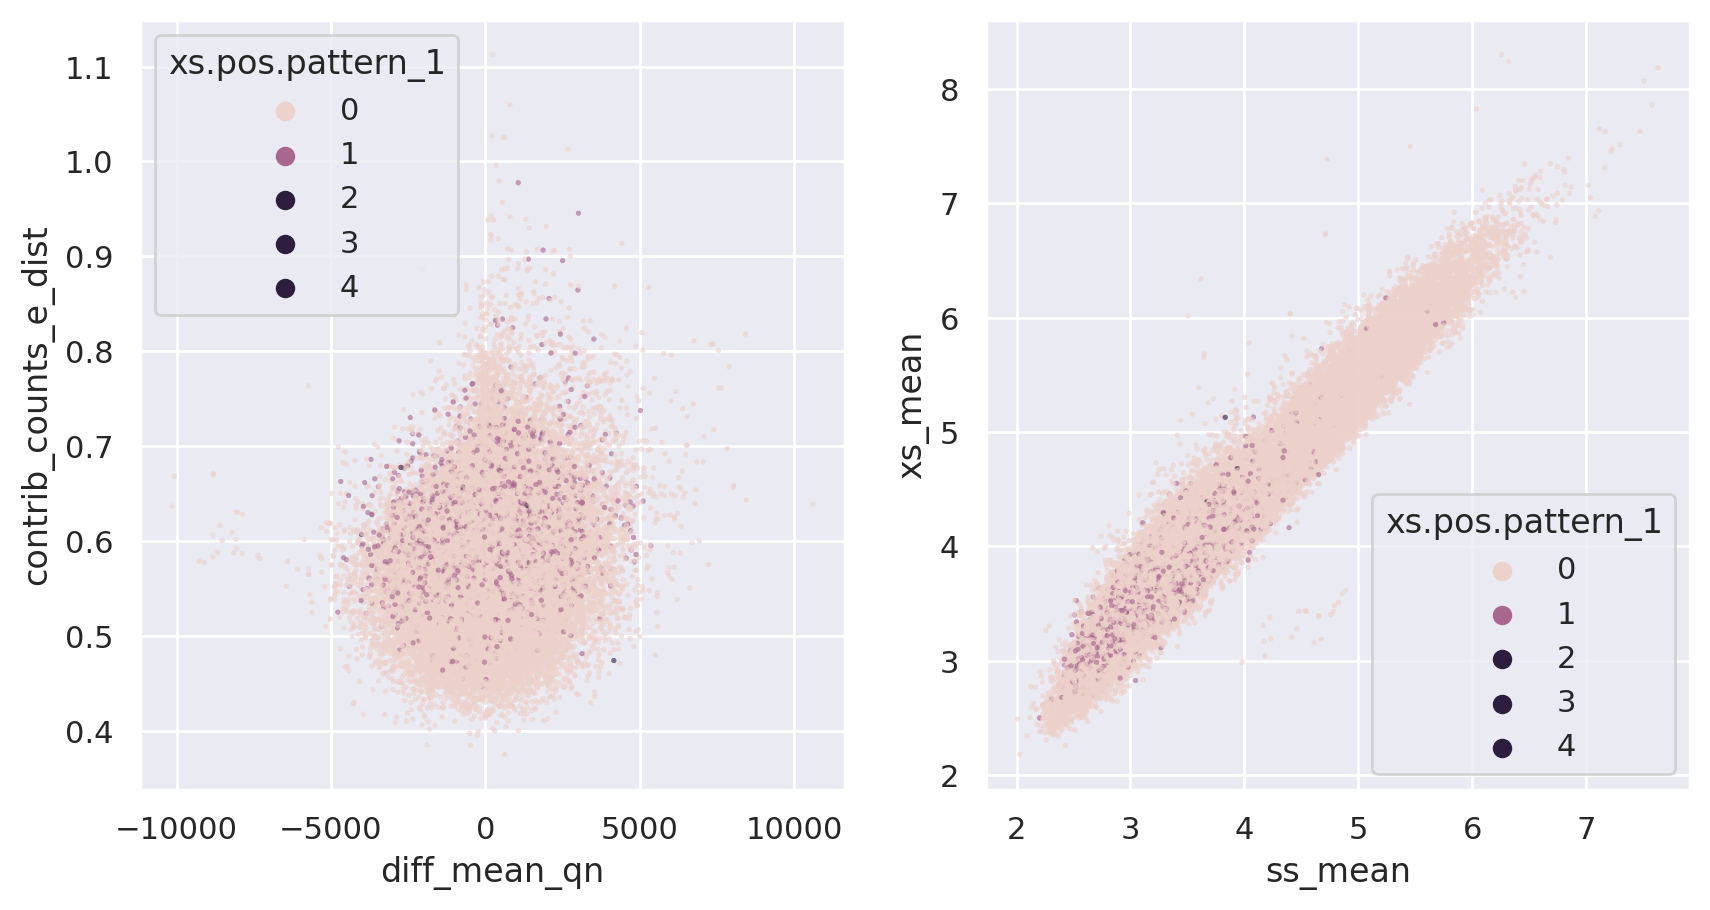

In [15]:
plot_pattern("xs.pos.pattern_1")


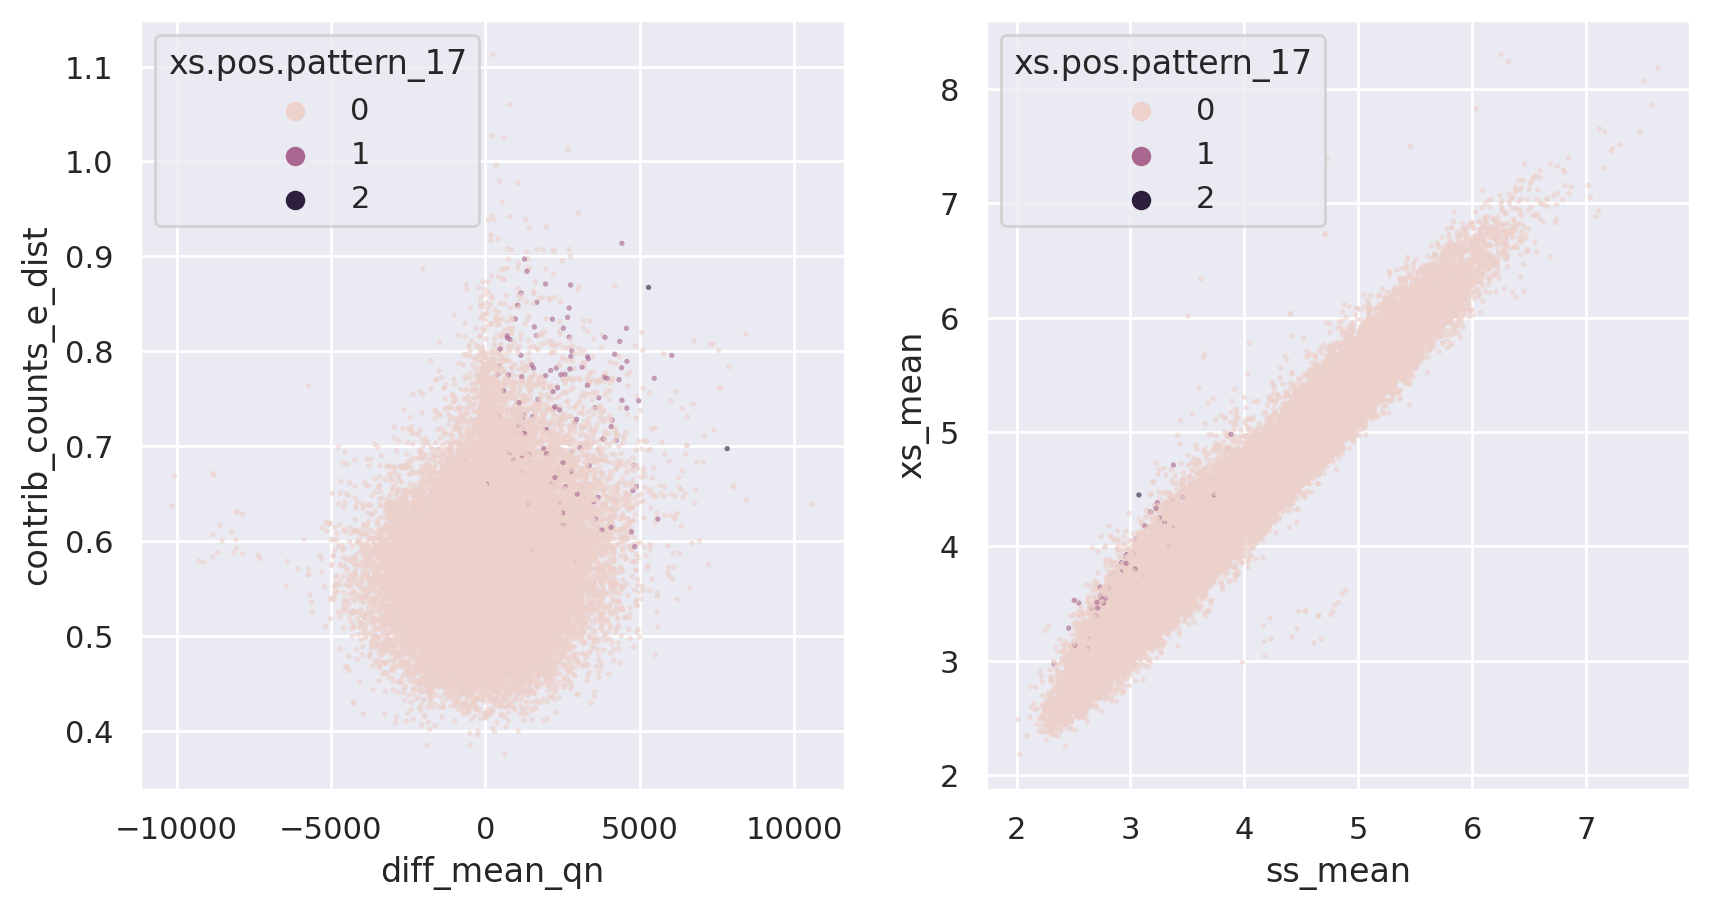

In [16]:
plot_pattern("xs.pos.pattern_17")


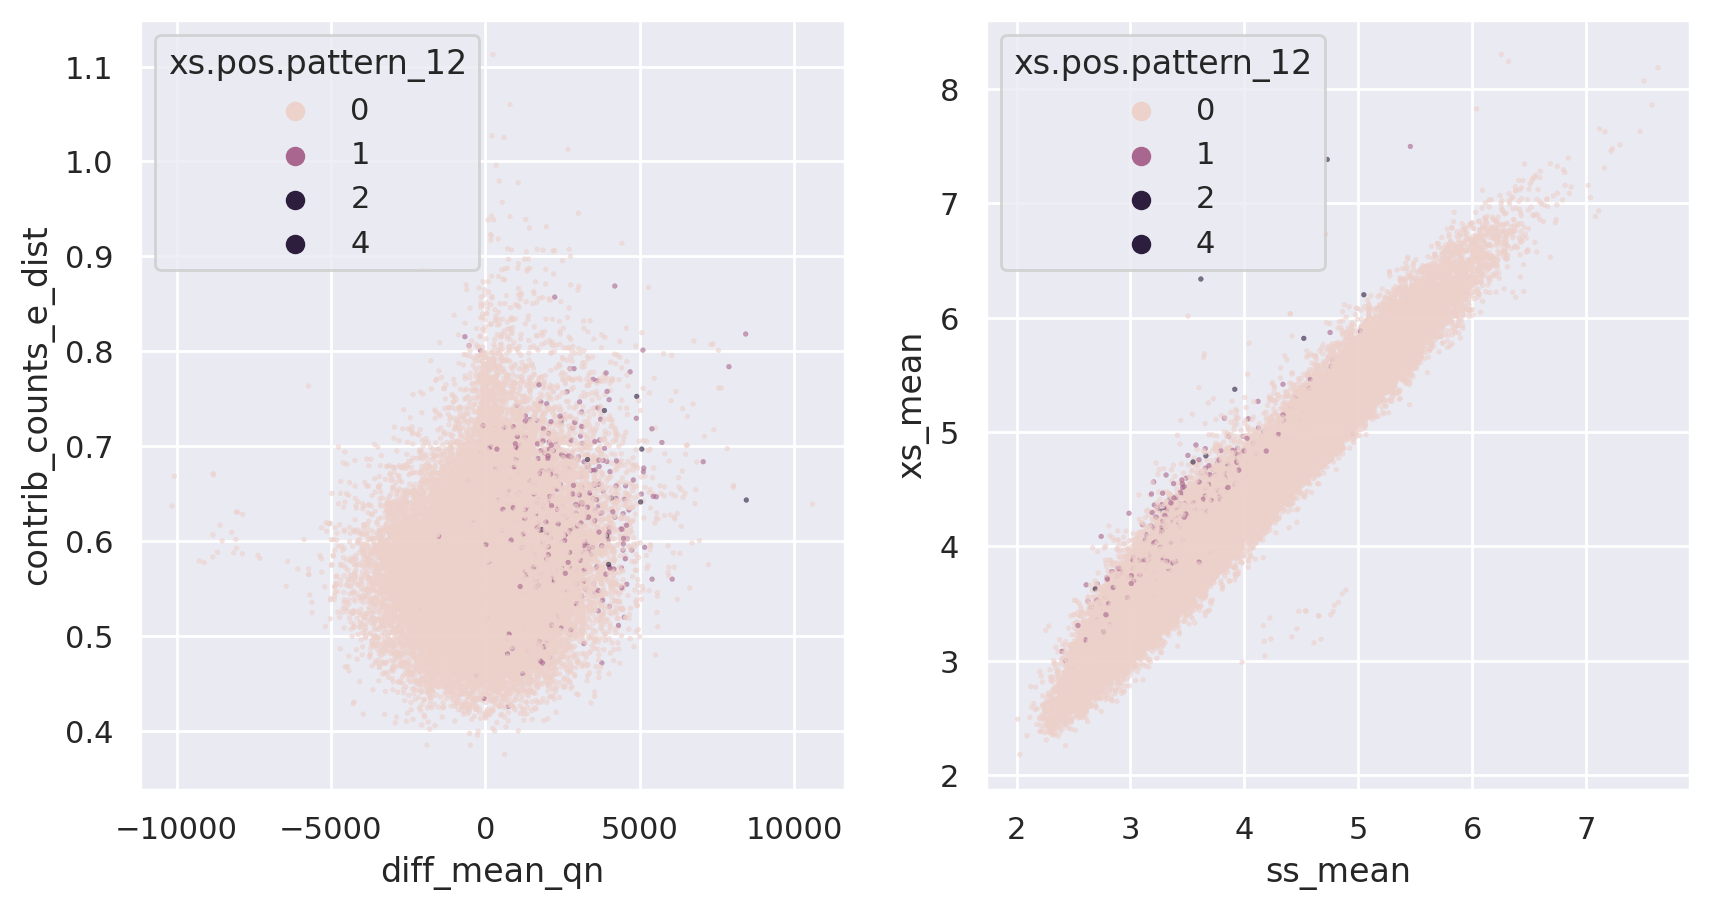

In [17]:
plot_pattern("xs.pos.pattern_12")



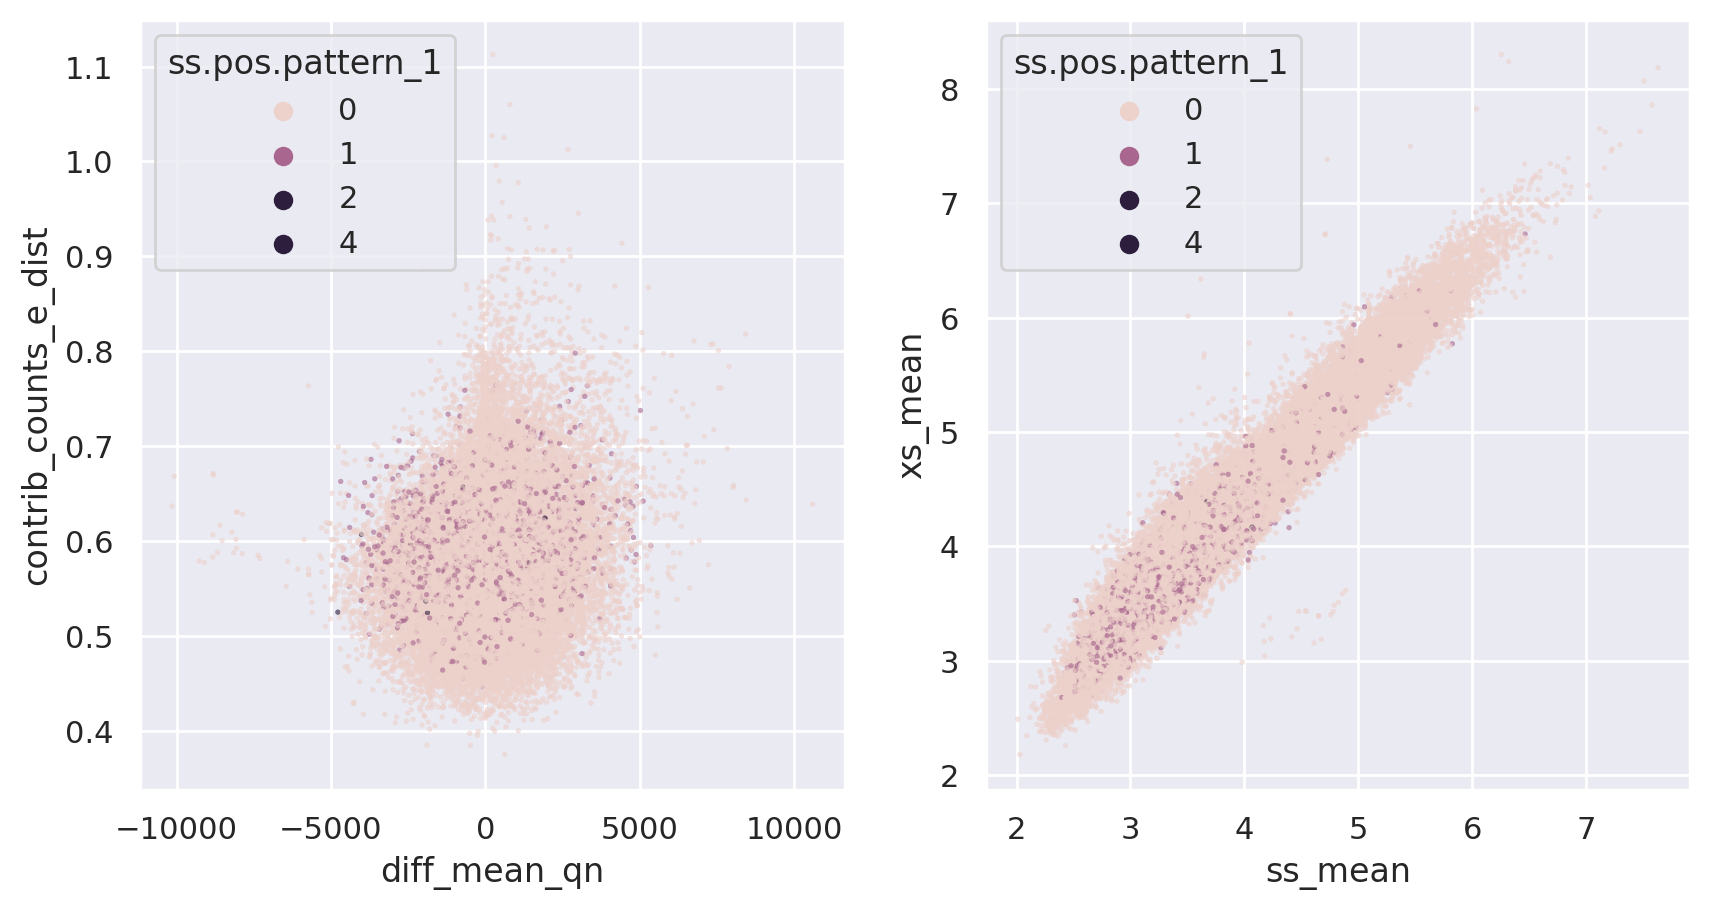

In [18]:
plot_pattern("ss.pos.pattern_1")
